In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [54]:
df= pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [55]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [56]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [57]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Therefore columns having null values are 'negativereason', 'negativereason_confidence','airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone'

#### Finding % of missing data for each column

In [58]:
q=(df.isnull() | df.isna())
print(((q.sum()/ df.shape[0])*100).round(2))

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64


tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data. We'll delete these columns

In [59]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']

In [60]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.3+ MB


In [62]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [63]:
airline_names=df['airline'].unique()
airline_names

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

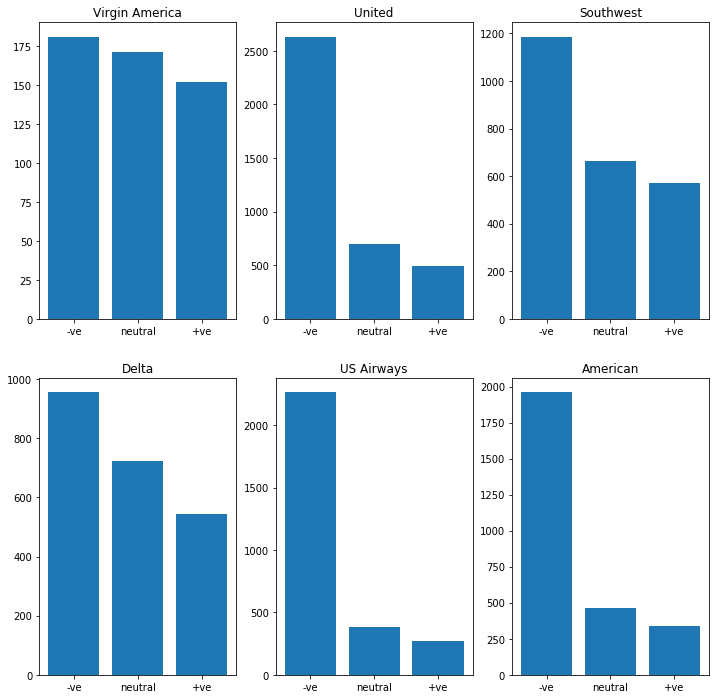

In [64]:
# Visualizing Sentiment with airline
plt.figure(figsize=(12, 12))
i=1
for airline in airline_names:
    a=df[df['airline']==airline]
    sentiment_count=a['airline_sentiment'].value_counts()
    sentiments=['-ve','neutral','+ve']
    plt.subplot(2,3,i)
    i+=1
    plt.bar(sentiments,sentiment_count)
    plt.title(airline)

Sentiments of three airlines are skewed towards negative sentiments, whereas sentiments of other three airlines are somewhat balanced

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

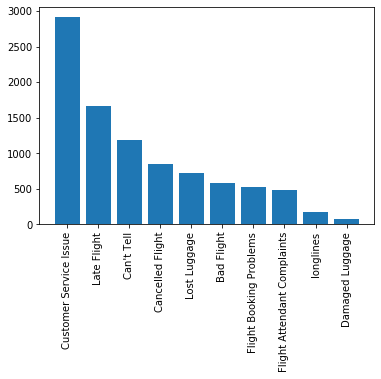

In [65]:
#Visualizing Sentiment with Negative Reasons counts
NR_Count=dict(df['negativereason'].value_counts())
NRkeys=NR_Count.keys()
NRvalues=NR_Count.values()
plt.bar(NRkeys,NRvalues)
plt.xticks(rotation=90)

We see that a high proportion of negative reasons is due to customer service issue followed by late flight

In [66]:
def nr_airline_plot_helper(airline):
    a=df[df['airline']==airline]
    NR_Count=dict(a['negativereason'].value_counts())
    NRkeys=NR_Count.keys()
    NRvalues=NR_Count.values()
    plt.bar(NRkeys,NRvalues)
    plt.xticks(rotation=90)
    plt.title(airline,fontsize=30,color='w')
    plt.ylabel('Count',fontsize=25,color='w')
    plt.xlabel('Reason',fontsize=25,color='w')

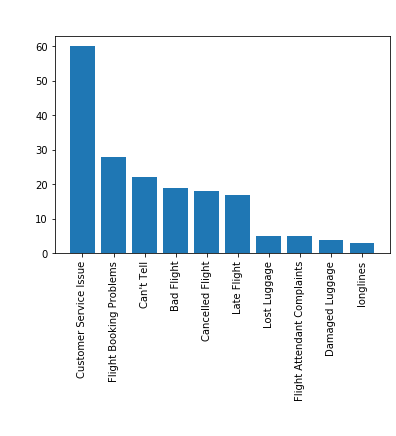

In [67]:
#visualizing negative reasons with respect to indiviudal airlines
nr_airline_plot_helper(airline_names[0])

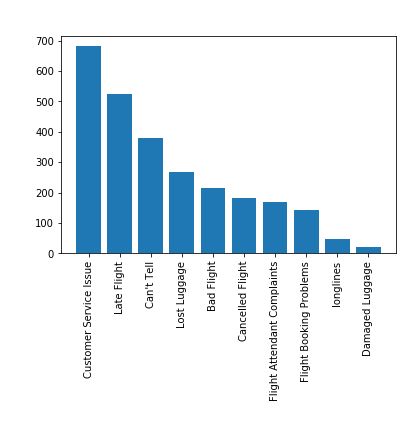

In [68]:
nr_airline_plot_helper(airline_names[1])

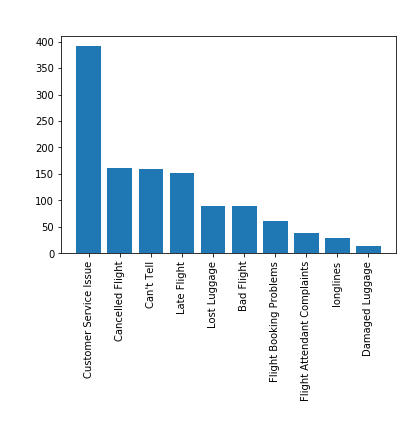

In [69]:
nr_airline_plot_helper(airline_names[2])

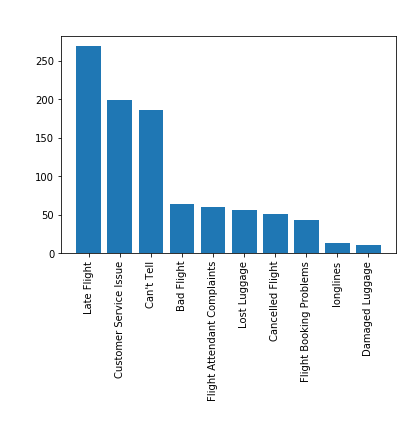

In [70]:
nr_airline_plot_helper(airline_names[3])

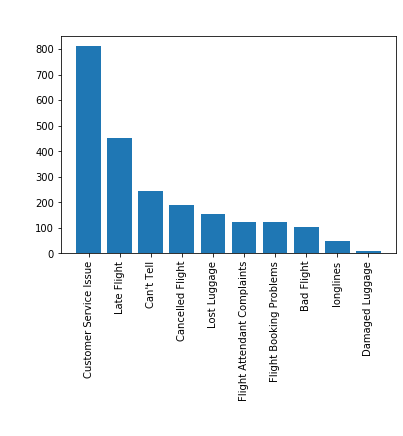

In [71]:
nr_airline_plot_helper(airline_names[4])

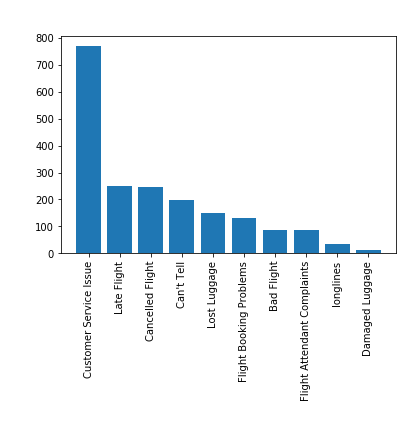

In [72]:
nr_airline_plot_helper(airline_names[5])

In [73]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [74]:
#We are going to distinguish two cases: 
#tweets with negative sentiment and tweets with non-negative sentiment
df['sentiment']=df['airline_sentiment'].apply(lambda x: 1 if x=='negative' else 0)

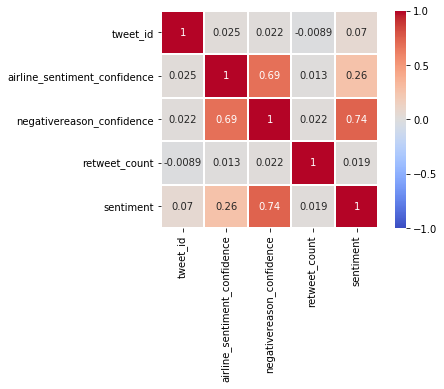

In [75]:
import seaborn as sns
corr=df.corr()
ax = sns.heatmap(corr,square = True,linewidths = 1,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': 1,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,vmax = 1,
                      annot = True,annot_kws = {'size': 10})

#### negativereason_confidence&sentiment , negativereason_confidence&airline_sentiment_confidence have a high degree of correlation

In [76]:
#Cleaning and preprocessing tweets
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    meaningful_words=tweet_to_words(raw_tweet)
    return(len(meaningful_words)) 


In [77]:
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))
df['Tweet_length']=df['text'].apply(lambda x: clean_tweet_length(x))

In [78]:
train_data,test_data = train_test_split(df,test_size=0.2,random_state=0)

In [79]:
train_clean_tweet=[]
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [80]:
pd.DataFrame(train_data).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712 entries, 8224 to 2732
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      11712 non-null  int64  
 1   airline_sentiment             11712 non-null  object 
 2   airline_sentiment_confidence  11712 non-null  float64
 3   negativereason                7308 non-null   object 
 4   negativereason_confidence     8388 non-null   float64
 5   airline                       11712 non-null  object 
 6   name                          11712 non-null  object 
 7   retweet_count                 11712 non-null  int64  
 8   text                          11712 non-null  object 
 9   tweet_created                 11712 non-null  object 
 10  tweet_location                7926 non-null   object 
 11  user_timezone                 7910 non-null   object 
 12  sentiment                     11712 non-null  int64  
 13 

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features= (v.fit_transform(train_clean_tweet))
test_features=(v.transform(test_clean_tweet))
train_features_dense=train_features.toarray()
test_features_dense=test_features.toarray()

In [82]:
train_features.shape, test_features.shape

((11712, 11920), (2928, 11920))

In [83]:
len(v.get_feature_names()),v.get_feature_names()

(11920,
 ['aa',
  'aaaand',
  'aadvantage',
  'aafail',
  'aakjumxa',
  'aal',
  'aaron',
  'aarp',
  'aau',
  'aavvoreph',
  'aay',
  'ab',
  'aback',
  'abandon',
  'abandoned',
  'abandonment',
  'abassinet',
  'abbreve',
  'abc',
  'abcnetwork',
  'abcnews',
  'abducted',
  'abi',
  'abigailedge',
  'abilities',
  'ability',
  'able',
  'aboard',
  'aboout',
  'abounds',
  'abq',
  'abroad',
  'absolute',
  'absolutely',
  'absorber',
  'absoulutely',
  'absurd',
  'absurdity',
  'absurdly',
  'abt',
  'abtwf',
  'abundance',
  'abuse',
  'abused',
  'abysmal',
  'ac',
  'acarl',
  'acc',
  'accelerate',
  'accept',
  'acceptable',
  'accepted',
  'accepting',
  'acces',
  'access',
  'accessibility',
  'accessible',
  'accessing',
  'accident',
  'accidentally',
  'accidents',
  'accomidating',
  'accommodate',
  'accommodated',
  'accommodates',
  'accommodating',
  'accommodation',
  'accommodations',
  'accompaniments',
  'accompany',
  'accomplish',
  'accomplished',
  'accord

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [85]:
clf=RandomForestClassifier(random_state=10)
#taking train_featues as x and target y as sentiment
clf.fit(train_features,train_data['sentiment'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [86]:
pred=clf.predict(test_features)
accuracy_score(pred,test_data['sentiment'])

0.8056693989071039

In [87]:
clf=RandomForestClassifier(random_state=10)
# taking train_featues as x and target y as sentiment
clf.fit(train_features_dense,train_data['sentiment'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [88]:
pred=clf.predict(test_features_dense)
accuracy_score(pred,test_data['sentiment'])

0.8056693989071039

In [89]:
type(train_features),type(train_features_dense)

(scipy.sparse.csr.csr_matrix, numpy.ndarray)